# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data

header1=soup.find('title')
print(header1.text)

header2=soup.find('p',class_='col-md-8 fs-4')
print(header2.text)


table = soup.find('table')

# Extract the headers (column names)
table_headers = [th.text.strip() for th in table.find_all('th')]
print("Table Headers:", table_headers)

# Extract the rows of data (skip the header row)
rows = [[td.text.strip() for td in tr.find_all('td')] for tr in table.find_all('tr')[1:]]
print("Sample Row:", rows[0])  # Print the first row to verify

Mars Temperature Data
This is Mars data.
Table Headers: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
Sample Row: ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

mars_df=df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Loop through the scraped data to create a list of rows
mars_df.columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(mars_df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [10]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype(object)  # Convert to object
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])  # Convert to datetime
print(mars_df['terrestrial_date'].head())


0   2012-08-16
1   2012-08-17
2   2012-08-18
3   2012-08-19
4   2012-08-20
Name: terrestrial_date, dtype: datetime64[ns]


In [11]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].nunique()
print(f"Number of unique Martian months: {mars_months}")


Number of unique Martian months: 12


In [13]:
# 2. How many sols (Martian days) worth of data are there?
mars_days = mars_df['sol'].nunique()
print(f"Number of unique Martian days (sols): {mars_days}")

Number of unique Martian days (sols): 1867


In [14]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
print(average_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


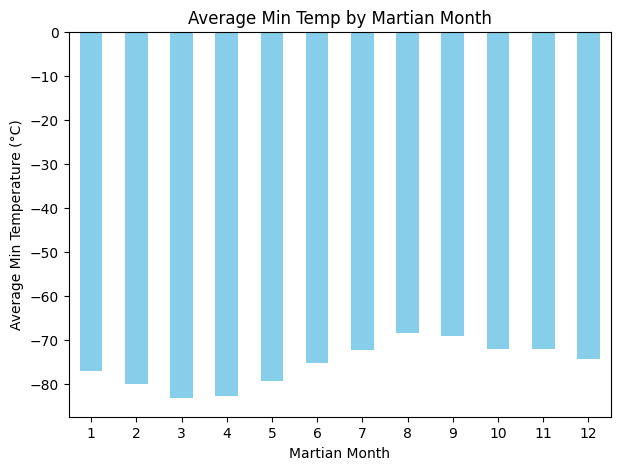

In [15]:
# Plot the average minimum temperature by month
average_min_temp_by_month.plot(kind='bar', title='Average Min Temp by Martian Month', color='skyblue', figsize=(7,5))

plt.xlabel('Martian Month')
plt.ylabel('Average Min Temperature (°C)')
plt.xticks(rotation=0) 

# Display the plot
plt.show()

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64
The coldest month is Martian month 3 with an average minimum temperature of -83.31°C.
The hottest month is Martian month 8 with an average minimum temperature of -68.38°C.


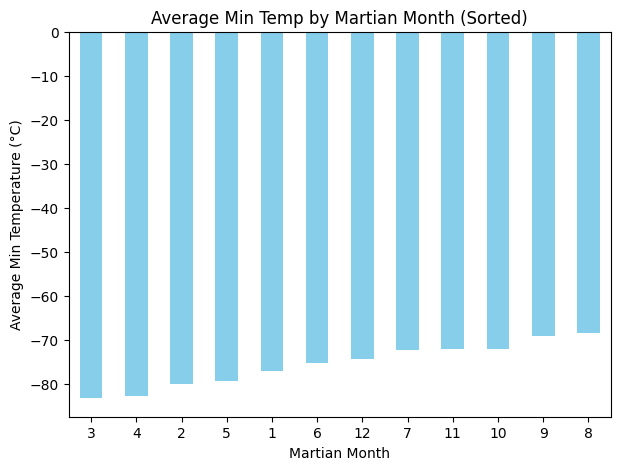

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temp_by_month = average_min_temp_by_month.sort_values()
print(sorted_temp_by_month)

coldest_month = average_min_temp_by_month.idxmin()
coldest_temp = average_min_temp_by_month.min()

# Find the hottest month
hottest_month = average_min_temp_by_month.idxmax()
hottest_temp = average_min_temp_by_month.max()

# Display the results
print(f"The coldest month is Martian month {coldest_month} with an average minimum temperature of {coldest_temp:.2f}°C.")
print(f"The hottest month is Martian month {hottest_month} with an average minimum temperature of {hottest_temp:.2f}°C.")

#sorting data and creating a plot
sorted_average_min_temp = average_min_temp_by_month.sort_values()
sorted_average_min_temp.plot(kind='bar', title='Average Min Temp by Martian Month (Sorted)', color='skyblue', figsize=(7, 5))

plt.xlabel('Martian Month')
plt.ylabel('Average Min Temperature (°C)')
plt.xticks(rotation=0) 

# Display the plot
plt.show()

In [17]:
# 4. What is the average pressure by month?
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

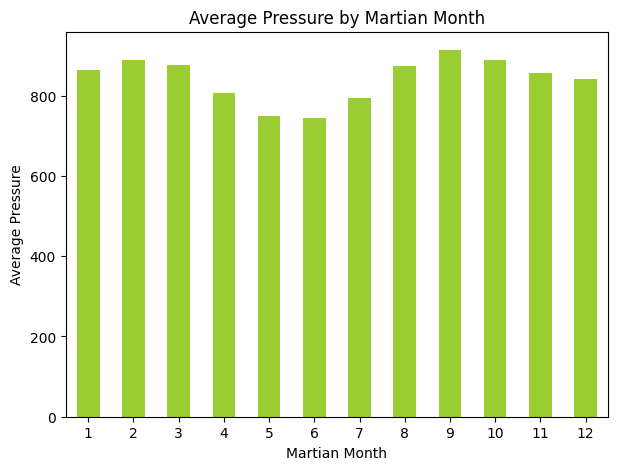

In [18]:
# Plot the average pressure by month
average_pressure_by_month.plot(kind='bar', title='Average Pressure by Martian Month', color='yellowgreen', figsize=(7,5))

plt.xlabel('Martian Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=0) 

# Display the plot
plt.show()

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64
The lowest pressure of all Martian year is Month 6 with an average minimum pressure of 745.05
The highest pressure of all Martian year is Month 9 with an average maximum pressure of 913.31


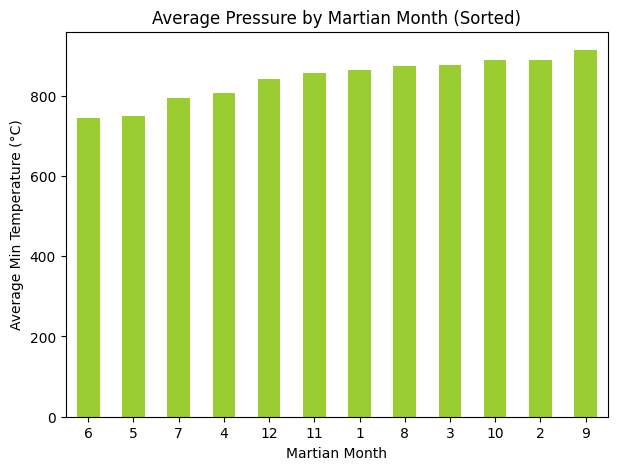

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure_by_month = average_pressure_by_month.sort_values()
print(sorted_pressure_by_month)

lowest_pressure_month= average_pressure_by_month.idxmin()
lowest_pressure= average_pressure_by_month.min()

# Find the hottest month
highest_pressure_month = average_pressure_by_month.idxmax()
highest_pressure = average_pressure_by_month.max()

# Display the results
print(f"The lowest pressure of all Martian year is Month {lowest_pressure_month} with an average minimum pressure of {lowest_pressure:.2f}")
print(f"The highest pressure of all Martian year is Month {highest_pressure_month} with an average maximum pressure of {highest_pressure:.2f}")

#sorting data and creating a plot
sorted_average_pressure = sorted_pressure_by_month.sort_values()
sorted_average_pressure.plot(kind='bar', title='Average Pressure by Martian Month (Sorted)', color='yellowgreen', figsize=(7, 5))

plt.xlabel('Martian Month')
plt.ylabel('Average Min Temperature (°C)')
plt.xticks(rotation=0) 

# Display the plot
plt.show()

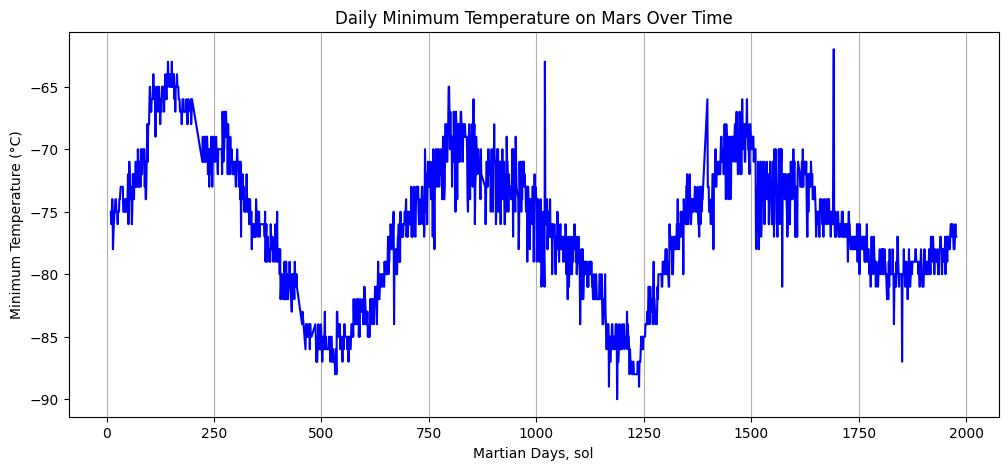

In [20]:
# 5. How many Martian days are there in a Martian year?

# Plot the daily minimum temperature to identify seasonal cycles
plt.figure(figsize=(12, 5))
plt.plot(mars_df['sol'], mars_df['min_temp'], color='blue')

# Add labels and title
plt.title('Daily Minimum Temperature on Mars Over Time')
plt.xlabel('Martian Days, sol')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(axis='x')

# Display the plot
plt.show()

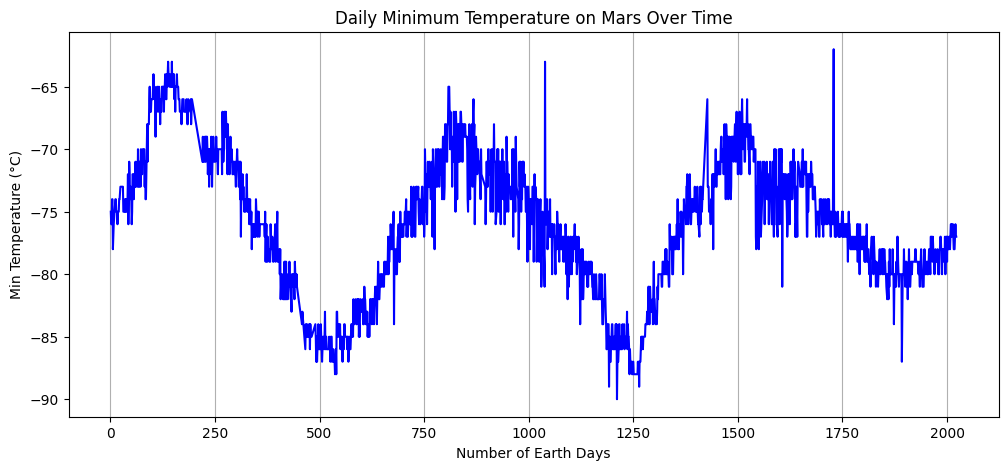

In [21]:
#6. How many terrestrial (Earth) days are there in a Martian year?
# Using DF mars_df  and 'terrestrial_date' as a dataline column, to count in Earth days Martian year

# Generate day numbers starting from 1, based on the difference from the first terrestrial date
mars_df['day_number'] = (mars_df['terrestrial_date'] - mars_df['terrestrial_date'].min()).dt.days + 1

#layout adjustments
plt.figure(figsize=(12, 5))
plt.plot(mars_df['day_number'], mars_df['min_temp'], color='blue')
plt.grid(axis='x')

# Add labels and title
plt.xlabel('Number of Earth Days')
plt.ylabel('Min Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars Over Time')

# Display the plot
plt.show()

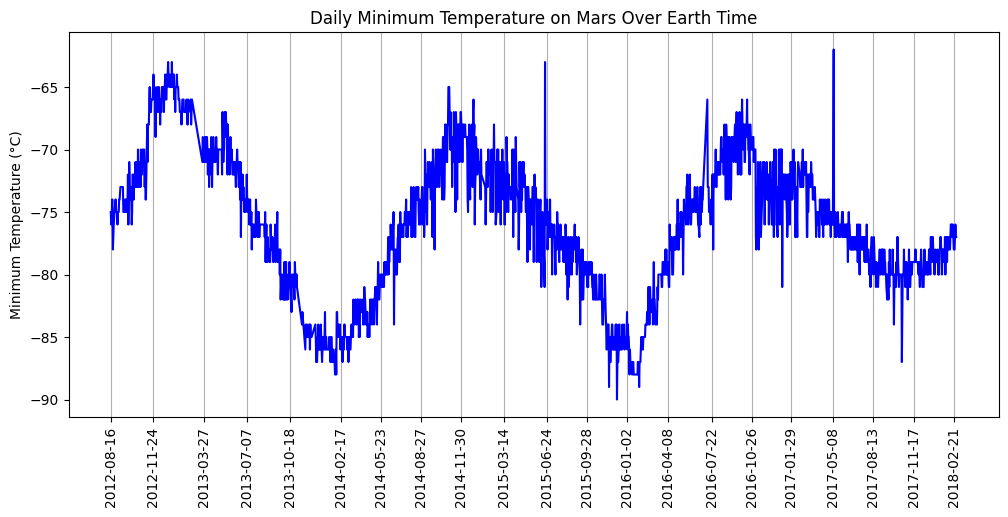

In [22]:
#6 How many terrestrial (Earth) days are there in a Martian year?
#Lets do same chart but in year-month format
# Sort the DataFrame by terrestrial_date to ensure the data is ordered correctly
mars_df['month_year'] = mars_df['terrestrial_date'].dt.strftime('%b %Y') 

# Plotting the data to visually inspect the cycles
plt.figure(figsize=(12, 5))
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], color='blue')
plt.title('Daily Minimum Temperature on Mars Over Earth Time')

num_labels = 20 #making more labels
x_ticks = mars_df['terrestrial_date'][::len(mars_df) // num_labels]  

# Set the x-ticks and labels
plt.xticks(ticks=x_ticks, rotation=90)

plt.ylabel('Minimum Temperature (°C)')
plt.grid(axis='x')

plt.show()

In [24]:
# Define the APPROXIMATE dates as of nearest peaks and troughs
from datetime import datetime
# Peak 1: The first maximum temperature observed
date1_obj = datetime(2014, 10, 30)  # first peak date

# Peak 2: The second maximum temperature observed
date2_obj = datetime(2016, 9, 26)  # second peak date

# Trough 1: The first minimum temperature observed
date3_obj = datetime(2014, 1, 15)  # first trough date

# Trough 2: The second minimum temperature observed
date4_obj = datetime(2015, 12, 2)  # second trough date

# Calculate the difference in days between the two peak dates
date_difference1 = date2_obj - date1_obj

# Calculate the difference in days between the two trough dates
date_difference2 = date4_obj - date3_obj

# Print the differences in days between the dates
print(f"The difference between {date1_obj.date()} and {date2_obj.date()} is {date_difference1.days} days.")
print(f"The difference between {date3_obj.date()} and {date4_obj.date()} is {date_difference2.days} days.")

The difference between 2014-10-30 and 2016-09-26 is 697 days.
The difference between 2014-01-15 and 2015-12-02 is 686 days.


#### Minimum Temperature

Mars may not offer the warmth of a tropical island, like Hawaii, we can see that this planet is pretty cold with year bounce from -68 to -83oC 

The coldest month is Month 3, with an average minimum temperature of -83.31°C
The hottest month is Month 8 with an average minimum temperature of -68.38°C.

#### Atmospheric Pressure

Normal atmosphere pressure on Earth is 101,325 Pa. And on Mars it’s bounces from 745 to 913 and this is less than 1% of Earth’s atmospheric pressure.

The lowest pressure of all Martian year is Month 6 with an average minimum pressure of 745.05
The highest pressure of all Martian year is Month 9 with an average maximum pressure of 913.31


#### Year Length

1 Martian day is 24 hours, 37 minutes and 22 seconds long according to NASA. 
It is almost the same duration as an earth day(24h). 
But what about Martian year? in a Martian year there are 687 days according to the same source.

Also we can calculate it manually, as difference in days between two nearest peaks or two nearest trough on our graph, 
My manual calculations say that:

The difference between 2014-10-30 and 2016-09-26 is 697 days(two nearest peaks).

The difference between 2014-01-15 and 2015-12-02 is 686 days(two nearest troughs)

This is not as precise as the theoretical calculation, but it is close


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv', index=False)

print("DataFrame has been successfully written to 'mars_weather_data.csv'.")

DataFrame has been successfully written to 'mars_weather_data.csv'.


In [26]:
browser.quit()